## 2020 빅콘테스트
- 참여: 데이터분석 챔피언리그
- 목표: 평가데이터 기반의 편성별＇판매 실적‘ 예측 정확도 및 편성 최적화 방안(모형)
- 링크: https://www.bigcontest.or.kr/points/content.php#ct05

----------------------

### CH1. 데이터 정제 for  EDA 

In [1]:
import pandas as pd

In [2]:
# 주의) 
try:
    raw_data = pd.read_csv("C:/Users/ghkdn/Jupyter/Big_Contest/performance_Data.csv")
except:
    print("파일 경로 설정을 바꾸고 CSV파일로 변경할 것")

In [3]:
data_performance = raw_data.T.reset_index()
data_performance = data_performance.drop(columns=['index']).T
data_performance = data_performance.rename(columns=data_performance.iloc[0])
data_performance = data_performance.drop(data_performance.index[0])
#data_performance = data_performance.set_index("방송일시")
data_performance['방송일시'] = pd.to_datetime(data_performance['방송일시'], format = '%Y-%m-%d %H:%M')

###  1-1. NS Shop 일자별, 상품군 및 상품명별 실적 데이터 (2019년)

In [4]:
print(f'매트릭스 크기: {data_performance.shape}')
data_performance.head()

매트릭스 크기: (38309, 8)


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
1,2019-01-01 06:00:00,20,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","2,099,000"
2,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","4,371,000"
3,2019-01-01 06:20:00,20,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","3,262,000"
4,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,"39,900","6,955,000"
5,2019-01-01 06:40:00,20,100346,201072,테이트 남성 셀린니트3종,의류,"39,900","6,672,000"


### 1-2. NS SHOP 일자별, 시간대별 시청률 데이터  (2019년)

In [5]:
# 주의) 
try:
    raw_data_view = pd.read_csv("viewship_Data.csv")
except:
    print("파일 경로 설정을 바꾸고 CSV파일로 변경할 것")

In [6]:
raw_data_view = pd.read_csv("viewship_Data.csv")
data_view = raw_data_view.T.reset_index()
data_view = data_view.drop(columns=['index'])
data_view = data_view.T.set_index(0).T

print(f'매트릭스 크기: {data_view.shape}')
data_view.head()

매트릭스 크기: (366, 1442)


,시간대,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,...,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59,월화수목금토일02:00-01:59
1,2019-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.004
2,2019-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.006
3,2019-01-03,0,0,0,0.014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.002
4,2019-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.003
5,2019-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.027,0,0,0,0.002


#### 주의사항: 맨끝 행과 열은 합계를 의미
- 마지막 일자열이 (2019-01-01 to 2019-12-31)으로 구성되어있는데, 해당열은 전체 시간대별 시청율 총합을 의미한다.  
  ex. (2019-01-01 to 2019-12-31) 열의 1행은 02:00 시간대 2019년도 시청률 총합을 의미한다.  
- 마찬가지로 행의 경우, (월화수목금토일02:00-01:59)으로 구성되어 있는데, 해당 행은 전체 년도별 시청률 총합을 의미한다.

SOL) 마지막 행, 열 제거 필요

In [75]:
print(f"마지막열 컬럼명: '{data_view.iloc[:,-1:].columns[0]}'로서 요일 합을 의미 " )
print(f"마지막행 컬럼명: '{data_view['시간대'][-1:].values[0]}'로서 요일 합을 의미 " )

마지막열 컬럼명: '월화수목금토일02:00-01:59'로서 요일 합을 의미 
마지막행 컬럼명: '2019-01-01 to 2019-12-31'로서 요일 합을 의미 


In [76]:
data_view = data_view.drop(columns=["월화수목금토일02:00-01:59"])
data_view.drop(data_view.tail(1).index,inplace=True)
data_view.head()

,시간대,02:00,02:01,02:02,02:03,02:04,02:05,02:06,02:07,02:08,...,01:50,01:51,01:52,01:53,01:54,01:55,01:56,01:57,01:58,01:59
1,2019-01-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-01-03,0,0,0,0.014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2019-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.027,0,0,0


In [261]:
'''
# 저장하기
data_performance.to_csv("data_performance_forEDA.csv")
data_view.to_csv("data_view_forEDA.csv")
'''

----------------------

### CH2. EDA 탐색적 자료분석
- 데이터 스튜디오 사용
- GROUP BY를 통한 그룹별 데이터 특징 판단  
- LINK: https://datastudio.google.com/u/0/reporting/8d4ae5c7-9700-4e62-9365-49fa974fca60/page/BufaB/edit

#### Step1 . 결측값 비율 확인
* NAN 값 확인
* 상식수준에서 이상치 확인 ex.수치형 자료열에 문자 
* 정량자료 모두 float형으로 통일

#### 1-1. 상식수준에서의 이상치 확인  

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# 결측값 확인
print("*전체 결측값 확인*")
for i in data_performance.columns:
    print(f"[{i}] 결측값 개수 확인:{round(data_performance[i].isnull().sum()/len(data_performance)*100,2)}%")

print("\n\n\n *수치데이터 열에서 수치아닌 데이터 확인*")

# 수치형 데이터에서 수치아닌 값 확인 
def numeric_check(DF,col_list):
    for col_name in col_list:
        missing_value_num = 0
        missing_type = []
        for i in DF[col_name]:
            i = str(i)
            i = i.rstrip().lstrip().replace(",","")
            if i.isdigit() == True:
                continue
            elif i.isdigit() == False:
                missing_value_num+=1 
                missing_type.append(i)
        print(f"[{col_name}] 전체대비 이상치(+결측치) 비율:{round((missing_value_num/len(DF[col_name])) *100,2)}% ")
        print(f"[{col_name}] 이상치 형태:{set(missing_type)}")

numeric_check(data_performance,['노출(분)','판매단가',' 취급액 '])

*전체 결측값 확인*
[방송일시] 결측값 개수 확인:0.0%
[노출(분)] 결측값 개수 확인:43.81%
[마더코드] 결측값 개수 확인:0.0%
[상품코드] 결측값 개수 확인:0.0%
[상품명] 결측값 개수 확인:0.0%
[상품군] 결측값 개수 확인:0.0%
[판매단가] 결측값 개수 확인:0.0%
[ 취급액 ] 결측값 개수 확인:2.45%



 *수치데이터 열에서 수치아닌 데이터 확인*
[노출(분)] 전체대비 이상치(+결측치) 비율:43.81% 
[노출(분)] 이상치 형태:{'nan'}
[판매단가] 전체대비 이상치(+결측치) 비율:2.45% 
[판매단가] 이상치 형태:{'-'}
[ 취급액 ] 전체대비 이상치(+결측치) 비율:2.45% 
[ 취급액 ] 이상치 형태:{'nan'}


SOL) 
1. 결측값과 상식수준에서 이상치가 포함된 열은 [노출(분), 판매단가, 취급액)]
2. 노출(분)의 경우, 전체의 43.81%으로 절반정도가 결측값이 있고 취급액은 2.45%이다.
3. 수치형 데이터의 경우, 판매단가는 '-'로 채워진 데이터가 2.45% 확인된다.
4. 특이점은 취급액이 결측값인 행에서 판매단가는 '-' 으로 채워져있다.

#### Step2. 이상치 확인 for Box plot

In [119]:
data_performance.head()
temp = data_performance[['노출(분)','판매단가',' 취급액 ']]
temp

,노출(분),판매단가,취급액
1,20,"39,900","2,099,000"
2,NaN,"39,900","4,371,000"
3,20,"39,900","3,262,000"
4,NaN,"39,900","6,955,000"
5,20,"39,900","6,672,000"
...,...,...,...
38305,20,-,NaN
38306,20,-,NaN
38307,20,-,NaN
38308,20,-,NaN


<Figure size 720x576 with 0 Axes>

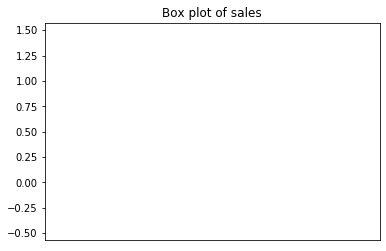

In [123]:
plt.figure(figsize=(10,8))
fig, ax = plt.subplots()
plt.boxplot(sales_list, sym="bo")
      
plt.title('Box plot of sales')
plt.xticks([0], ['sales'])

plt.show()

In [39]:
str(data_performance['노출(분)'].iloc[1]) =="nan"

True

In [53]:
missig_vaue_num = 0
for num, i in enumerate(data_performance['방송일시']):

    try:
        i.lstrip().rstrip()
    except:
        out_num+=1
print(f"[방송일시] 전체대비 결측 비율:{round((out_num/len(data_performance['방송일시'])) *100,2)}% ")

[판매단가] 전체대비 결측 비율:14.68% 


In [65]:
for i in data_performance.columns:
    print(f"[{i}] 결측값 개수 확인:{round(data_performance[i].isnull().sum()/len(data_performance)*100,2)}%")


[방송일시] 결측값 개수 확인:0.0%
[노출(분)] 결측값 개수 확인:43.81%
[마더코드] 결측값 개수 확인:0.0%
[상품코드] 결측값 개수 확인:0.0%
[상품명] 결측값 개수 확인:0.0%
[상품군] 결측값 개수 확인:0.0%
[판매단가] 결측값 개수 확인:0.0%
[ 취급액 ] 결측값 개수 확인:2.45%


In [108]:
missing_value_num = 0
missing_type = []
for i in data_performance[' 취급액 ']:
    i = str(i)
    i = i.rstrip().lstrip().replace(",","")
    if i.isdigit() == True:
        continue
    elif i.isdigit() == False:
        missing_value_num+=1 
        missing_type.append(i)
print(f"[취급액] 전체대비 이상치 비율:{round((missing_value_num/len(data_performance[' 취급액 '])) *100,2)}% ")
print(f"[취급액] 이상치 형태:{set(missing_type)}")

[취급액] 전체대비 이상치 비율:2.45% 
[취급액] 이상치 형태:{'nan'}


In [104]:
data_performance[' 취급액 ']

1         2,099,000 
2         4,371,000 
3         3,262,000 
4         6,955,000 
5         6,672,000 
            ...     
38305            NaN
38306            NaN
38307            NaN
38308            NaN
38309            NaN
Name:  취급액 , Length: 38309, dtype: object